In [1]:
#Vikas Bansal
#Here I will analyse scRNA matirx from EPO project using cross correlation analysis (SEURAT)
#MAtrix was generated by Abdul
#9 MAy 2018
library(Seurat)
library(dplyr)
library(Matrix)
set.seed(786)

Loading required package: ggplot2
Loading required package: cowplot

Attaching package: ‘cowplot’

The following object is masked from ‘package:ggplot2’:

    ggsave

Loading required package: Matrix

Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [2]:
##You can skip these 10-15 steps before tSNE and directly read immune.combined <- readRDS(paste0(outDir,"immune_combined.rds"))
#outDir="/home/jovyan/mount/Vikas/Projects/scRNA-MPIEM/OUTPUT/"
dump_all<-read.csv(file="../DATA/merged.csv")
rownames(dump_all)<-dump_all$GENE
dump_all$GENE<-NULL
dump_all[is.na(dump_all)]<-0



In [3]:
##Take the number of cells from previous filtering (cut-offs sugested by Abdul via his pre analysis)

#CreateandInitializeSeuratObject
mm_data_all<-CreateSeuratObject(raw.data=dump_all,min.cells=3,min.genes=1000,project="AllGroups")

#CheckforMitochondrialgenesandcalculatepercentagesacrossthecells
mito.genes_all<-grep(pattern="^mt-",x=rownames(x=mm_data_all@data),value=TRUE)
percent.mito_all<-colSums(mm_data_all@raw.data[mito.genes_all,])/colSums(mm_data_all@raw.data)

#AddMetaDataandplot
mm_data_all<-AddMetaData(object=mm_data_all,metadata=percent.mito_all,col.name="percent.mito")

#pdf("Volcano_mito.pdf.pdf",width=10,height=10)
#VlnPlot(object=mm_data_all,features.plot=c("nGene","nUMI","percent.mito"),nCol=3)
#dev.off()

#pdf("Scatter_mito.pdf.pdf",width=10,height=10)
#par(mfrow=c(1,2))
#GenePlot(object=mm_data_all,gene1="nUMI",gene2="percent.mito")
#GenePlot(object=mm_data_all,gene1="nUMI",gene2="nGene")
#dev.off()

#FilterCellsbyremovingoutliersandmitochondodrialcellsandthenplot
mm_data_all<-FilterCells(object=mm_data_all,subset.names=c("nGene","percent.mito"),
low.thresholds=c(1000,-Inf),high.thresholds=c(8000,0.40))


In [4]:
length(mm_data_all@cell.names)

[1] 973

In [23]:
#write.table(mm_data_all@raw.data, file="Filtered_cells_rawData.txt", sep="\t",quote=F)
#outDir="/home/jovyan/mount/Vikas/Projects/scRNA-MPIEM/OUTPUT/"

In [6]:
head(dump_all)
dim(dump_all)

,gr1_m1d1_CTATCCTTATGG,gr1_m1d1_CCGCCGTTTAGN,gr1_m1d1_AGGTGAAGCGTG,gr1_m1d1_TGAACTGAAACT,gr1_m1d1_AGATTGTACCAA,gr1_m1d1_TCCTTCGGAGAT,gr1_m1d1_GAATGTGTCACA,gr1_m1d1_CTACGTGTTCTA,gr1_m1d1_ATACTAGCCCGG,gr1_m1d1_GCGCGAACTATT,⋯,gr2_m6d2_TAATCGTCACCG,gr2_m6d2_CCTCATAATGCC,gr2_m6d2_CATCACCTTCCC,gr2_m6d2_CTATAACACACG,gr2_m6d2_CAACAATCAGTG,gr2_m6d2_AACCTAACCTAT,gr2_m6d2_CGACAGACACAG,gr2_m6d2_TCGTGGTCTATT,gr2_m6d2_TGTTTGCCCATT,gr2_m6d2_TCTAAGTCCACT
0610005C13Rik,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
0610007N19Rik,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
0610007P14Rik,4,5,3,1,0,1,1,0,1,2,⋯,0,0,0,0,0,0,0,0,0,0
0610009B22Rik,9,1,0,2,3,0,0,0,1,1,⋯,0,0,0,0,0,0,0,0,0,0
0610009D07Rik,3,7,0,1,0,0,0,1,5,0,⋯,0,0,0,0,0,0,0,0,0,0
0610009E02Rik,0,0,0,0,0,0,2,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


[1] 20234  6000

In [7]:
dump_allV2 <- (dump_all[,(mm_data_all@cell.names)])

In [8]:
Group1 <- (dump_allV2[,(grep("gr1",colnames(dump_allV2)))])
Group2 <- (dump_allV2[,(grep("gr2",colnames(dump_allV2)))])

In [9]:
dim(Group1)
dim(Group2)
head(Group1)
head(Group2)

[1] 20234   390

[1] 20234   583

,gr1_m1d1_AGGTGAAGCGTG,gr1_m1d1_TGAACTGAAACT,gr1_m1d1_AGATTGTACCAA,gr1_m1d1_TCCTTCGGAGAT,gr1_m1d1_GAATGTGTCACA,gr1_m1d1_CTACGTGTTCTA,gr1_m1d1_ATACTAGCCCGG,gr1_m1d1_GCGCGAACTATT,gr1_m1d1_GCGCGTCACCGA,gr1_m1d1_AGAGTGATGGCC,⋯,gr1_m3d1_GCGGCGGCAGCA,gr1_m3d1_TTACCTGGTGCT,gr1_m3d1_CCGAACTCTCGC,gr1_m3d1_CTCAGACTCCAC,gr1_m3d1_CTCAACGAGTAA,gr1_m3d1_ATGAGGCCATAG,gr1_m3d1_CAACGTCTGGGT,gr1_m3d1_TATCTATCCATA,gr1_m3d1_TTGGGCGGTCTA,gr1_m3d1_GCTTCGATAGCA
0610005C13Rik,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
0610007N19Rik,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
0610007P14Rik,3,1,0,1,1,0,1,2,0,1,⋯,0,0,0,1,0,0,0,0,0,0
0610009B22Rik,0,2,3,0,0,0,1,1,2,0,⋯,0,0,0,0,1,0,0,0,1,0
0610009D07Rik,0,1,0,0,0,1,5,0,2,2,⋯,0,0,0,0,0,1,0,0,1,1
0610009E02Rik,0,0,0,0,2,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,1,0


,gr2_m2d1_TAAATTGATCTG,gr2_m2d1_CATTATAAGATA,gr2_m2d1_GGATACCAACTT,gr2_m2d1_TCCCATTTAGAA,gr2_m2d1_TCCAGAGTGAGT,gr2_m2d1_AAATAACTGCTC,gr2_m2d1_TCATTCCGCAGG,gr2_m2d1_GTGCGCAATTAT,gr2_m2d1_CACGAATGGGTC,gr2_m2d1_ACCTTTTACATC,⋯,gr2_m6d2_TATGGAATACGC,gr2_m6d2_TATCTAAGGTCA,gr2_m6d2_ATTATCTTGTAN,gr2_m6d2_ACAGCGGTACCA,gr2_m6d2_GGCATAGTACCG,gr2_m6d2_TCGCCGAAAATG,gr2_m6d2_TATTCAATTGTA,gr2_m6d2_AATCCCAAGACN,gr2_m6d2_ATGGCGCTAGGG,gr2_m6d2_GACGCTATTAGA
0610005C13Rik,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
0610007N19Rik,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,3,0,0,0,0,0,0
0610007P14Rik,3,0,0,1,3,3,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
0610009B22Rik,1,1,0,6,0,4,0,0,0,0,⋯,4,0,0,0,0,0,0,0,0,0
0610009D07Rik,2,5,0,4,3,0,0,0,0,0,⋯,0,0,0,0,0,0,0,2,1,0
0610009E02Rik,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


In [10]:
# Set up control object
ctrl <- CreateSeuratObject(raw.data = Group1, project = "MPIEM_CTRL", min.cells = 3,min.genes=1000)
ctrl@meta.data$stim <- "CTRL"
ctrl <- FilterCells(ctrl, subset.names = "nGene", low.thresholds = 1000, high.thresholds = 8000)
ctrl <- NormalizeData(ctrl)
mito.genes_all<-grep(pattern="^mt-",x=rownames(x=ctrl@data),value=TRUE)
percent.mito_all<-colSums(ctrl@raw.data[mito.genes_all,])/colSums(ctrl@raw.data)
ctrl<-AddMetaData(object=ctrl,metadata=percent.mito_all,col.name="percent.mito")

ctrl <- ScaleData(ctrl, display.progress = F,vars.to.regress=c("nUMI","percent.mito"))
# Set up stimulated object
stim <- CreateSeuratObject(raw.data = Group2, project = "MPIEM_STIM", min.cells = 3,min.genes=1000)
stim@meta.data$stim <- "STIM"
stim <- FilterCells(stim, subset.names = "nGene", low.thresholds = 1000, high.thresholds = 8000)
stim <- NormalizeData(stim)
mito.genes_all<-grep(pattern="^mt-",x=rownames(x=stim@data),value=TRUE)
percent.mito_all<-colSums(stim@raw.data[mito.genes_all,])/colSums(stim@raw.data)
stim<-AddMetaData(object=stim,metadata=percent.mito_all,col.name="percent.mito")

stim <- ScaleData(stim, display.progress = F,vars.to.regress=c("nUMI","percent.mito"))



In [11]:
ctrl
stim

An object of class seurat in project MPIEM_CTRL 
 14061 genes across 390 samples.

An object of class seurat in project MPIEM_STIM 
 14971 genes across 583 samples.

In [12]:
ctrl
stim

An object of class seurat in project MPIEM_CTRL 
 14061 genes across 390 samples.

An object of class seurat in project MPIEM_STIM 
 14971 genes across 583 samples.

In [13]:
583+390

[1] 973

In [14]:
# Gene selection for input to CCA
ctrl <- FindVariableGenes(ctrl, do.plot = F)
stim <- FindVariableGenes(stim, do.plot = F)
g.1 <- head(rownames(ctrl@hvg.info), 1000)
g.2 <- head(rownames(stim@hvg.info), 1000)
genes.use <- unique(c(g.1, g.2))
genes.use <- intersect(genes.use, rownames(ctrl@scale.data))
genes.use <- intersect(genes.use, rownames(stim@scale.data))

In [15]:
length(genes.use)
length(g.1)
length(unique(c(g.1, g.2)))
#RunCCA
#CanonCor

[1] 1289

[1] 1000

[1] 1394

In [16]:
immune.combined <- RunCCA(ctrl, stim, genes.use = genes.use, num.cc = 30)

[1] "Scaling data matrix"
  |======================================================================| 100%


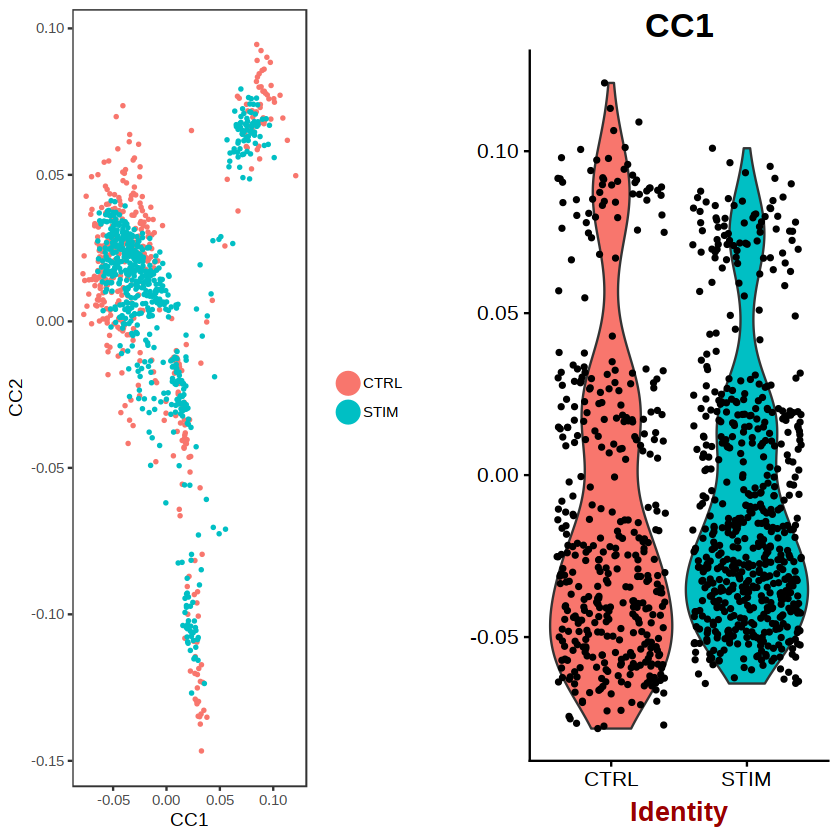

In [17]:
# visualize results of CCA plot CC1 versus CC2 and look at a violin plot
p1 <- DimPlot(object = immune.combined, reduction.use = "cca", group.by = "stim", 
    pt.size = 0.5, do.return = TRUE)
p2 <- VlnPlot(object = immune.combined, features.plot = "CC1", group.by = "stim", 
    do.return = TRUE)
plot_grid(p1, p2)

`geom_smooth()` using method = 'loess' and formula 'y ~ x'


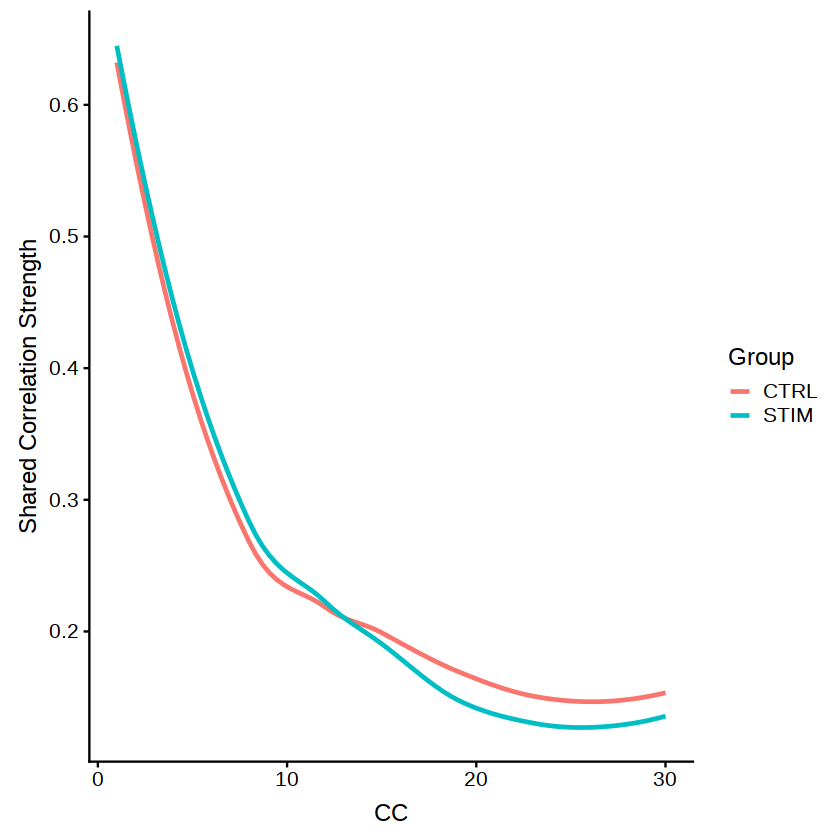

In [18]:
p3 <- MetageneBicorPlot(immune.combined, grouping.var = "stim", dims.eval = 1:30, 
    display.progress = FALSE)

In [19]:
immune.combined <- AlignSubspace(immune.combined, reduction.type = "cca", grouping.var = "stim", 
    dims.align = 1:20)

[1] "Scaling data matrix"
  |======================================================================| 100%
[1] "Scaling data matrix"
  |======================================================================| 100%


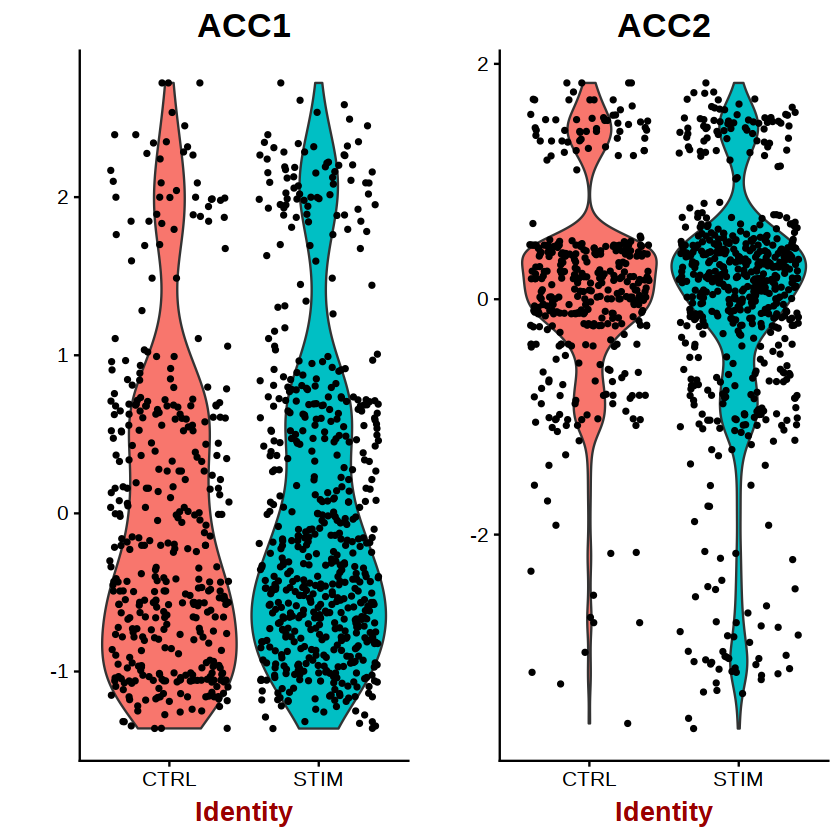

In [20]:
p1 <- VlnPlot(object = immune.combined, features.plot = "ACC1", group.by = "stim", 
    do.return = TRUE)
p2 <- VlnPlot(object = immune.combined, features.plot = "ACC2", group.by = "stim", 
    do.return = TRUE)
plot_grid(p1, p2)

In [21]:
# t-SNE and Clustering
immune.combined <- RunTSNE(immune.combined, reduction.use = "cca.aligned", dims.use = 1:20, 
    do.fast = T)
immune.combined <- FindClusters(immune.combined, reduction.type = "cca.aligned", 
    resolution = 1.1, dims.use = 1:20)

In [24]:
immune.combined <- readRDS(paste0(outDir,"immune_combined.rds"))

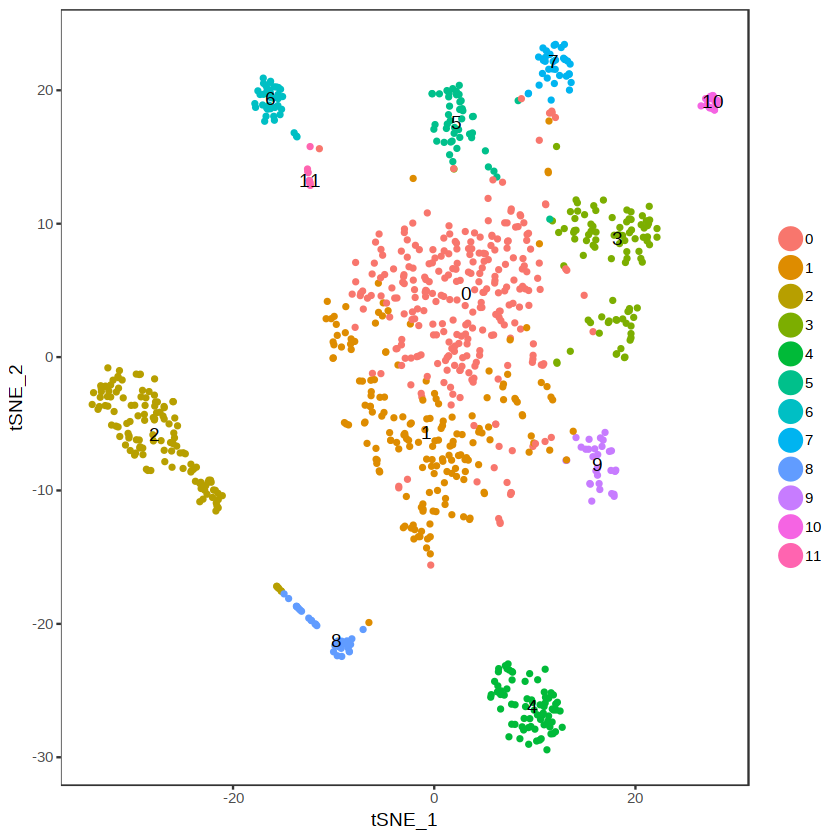

In [25]:
TSNEPlot(immune.combined, do.label = T, do.return = T, pt.size = 1)

In [26]:

immune.tmp <- immune.combined


In [257]:
#outDir="/home/jovyan/mount/Vikas/Projects/scRNA-MPIEM/OUTPUT/"

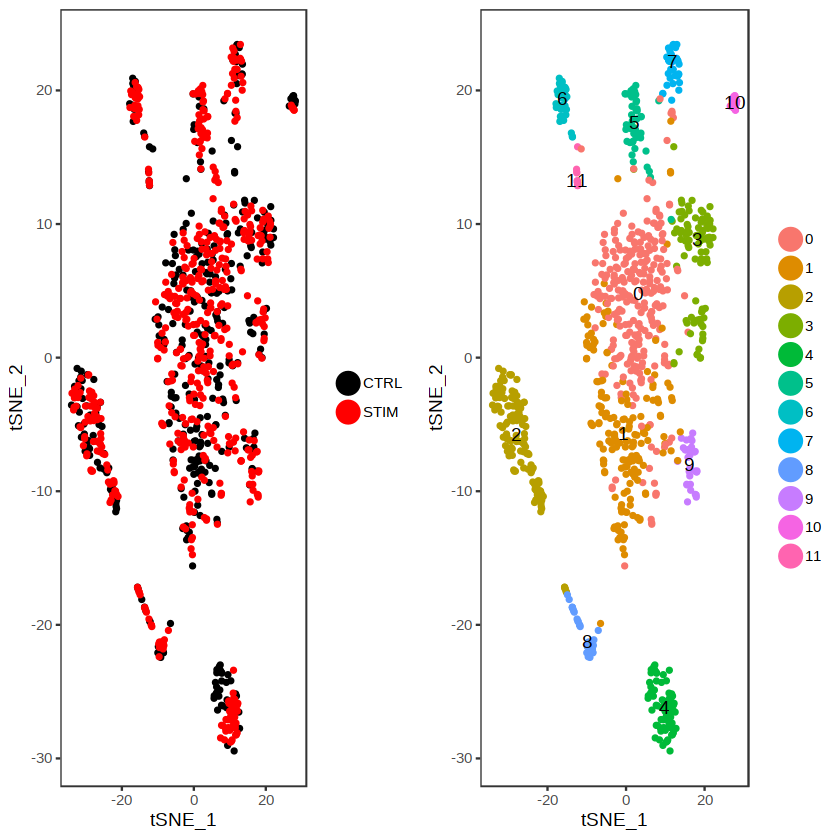

In [29]:
# Visualization
#pdf(paste0(outDir,"tSNEJo_Clusters.pdf"),width=20,height=10)
p1 <- TSNEPlot(immune.combined, do.return = T, pt.size = 1, group.by = "stim", col=c("black", "red"))
p2 <- TSNEPlot(immune.combined, do.label = T, do.return = T, pt.size = 1)
plot_grid(p1, p2)
#dev.off()

In [405]:
pdf(paste0(outDir,"ViolinPlotsMarkers.pdf"),width=15,height=10)
VlnPlot(object = immune.combined, features.plot = c("Camk2a", "Kif5c", "Slc7a10", "Lfng", "Tmem119", "C1qc", "Pdgfra", "Gpr17", "Mog", "Opalin", "Flt1", "Ly6c1", "Gad1", "Gad2", "Slc17a7", "Neurod6"), use.raw = TRUE, y.log = TRUE)
dev.off()

png 
  2

In [30]:
Ident_names2 <- immune.combined@ident
table(paste(sapply(strsplit(names(immune.combined@ident),"_"),"[[",1),Ident_names2, sep="_"))



 gr1_0  gr1_1 gr1_10 gr1_11  gr1_2  gr1_3  gr1_4  gr1_5  gr1_6  gr1_7  gr1_8 
   103     85     12      5     53     42     32     11     14     12     11 
 gr1_9  gr2_0  gr2_1 gr2_10 gr2_11  gr2_2  gr2_3  gr2_4  gr2_5  gr2_6  gr2_7 
    10    174     94      7      6     77     53     43     35     25     24 
 gr2_8  gr2_9 
    23     22 

In [578]:
pdf(paste0(outDir,"ViolinPlotsMarkersV2.pdf"),width=15,height=10)
VlnPlot(object = immune.combined, features.plot = c("Bcl11b", "Camk2a", "Slc7a10", "Lfng", "Aif1", "Tmem119", "Pdgfra", "Gpr17", "Mog", "Opalin", "Flt1", "Ly6c1", "Gad1", "Gad2", "Slc17a7", "Neurod6"), use.raw = TRUE, y.log = TRUE)
dev.off()

png 
  2

In [581]:
pdf(paste0(outDir,"ViolinPlotsMarkersKlf4Epor.pdf"),width=15,height=10)
VlnPlot(object = immune.combined, features.plot = c("Epor", "Ephb4", "Klf4"), use.raw = TRUE, y.log = TRUE)
dev.off()

png 
  2

In [496]:
pdf(paste0(outDir,"ViolinPlotsMarkersCellCycle.pdf"),width=15,height=10)
VlnPlot(object = immune.combined, features.plot = c("Mki67", "Cdk1", "Ccna2"), use.raw = TRUE, y.log = TRUE)
dev.off()
pdf(paste0(outDir,"FeaturePlotMarkersCellCycle.pdf"),width=15,height=10)
FeaturePlot(object = immune.combined, features.plot = c("Mki67", "Cdk1", "Ccna2"),cols.use = c("lightgrey", 
    "blue"), pt.size = 1)
dev.off()


png 
  2

png 
  2

In [497]:
pdf(paste0(outDir,"ViolinPlotsMarkersNSC.pdf"),width=15,height=10)
VlnPlot(object = immune.combined, features.plot = c("Id3", "Clu", "Egfr", "Rpl32"), use.raw = TRUE, y.log = TRUE)
dev.off()
pdf(paste0(outDir,"FeaturePlotMarkersNSC.pdf"),width=15,height=10)
FeaturePlot(object = immune.combined, features.plot = c("Id3", "Clu", "Egfr", "Rpl32"),cols.use = c("lightgrey", 
    "blue"), pt.size = 1)
dev.off()

png 
  2

png 
  2

In [498]:
pdf(paste0(outDir,"ViolinPlotsMarkersMicroglia.pdf"),width=15,height=10)
VlnPlot(object = immune.combined, features.plot = c("Cd86","Il23a", "Il4"), use.raw = TRUE, y.log = TRUE)
dev.off()
pdf(paste0(outDir,"FeaturePlotMarkersMicroglia.pdf"),width=15,height=10)
FeaturePlot(object = immune.combined, features.plot = c("Cd86","Il23a", "Il4"),cols.use = c("lightgrey", 
    "blue"), pt.size = 1)
dev.off()


png 
  2

png 
  2

In [ ]:
VlnPlot(object = immune.combined, features.plot = c("Nos2", "Tnf", "Il6", "Il23", "Cxcl10", "Cd86", "Arg1", "Il4", "Il10", "Cd206"), use.raw = TRUE, y.log = TRUE)


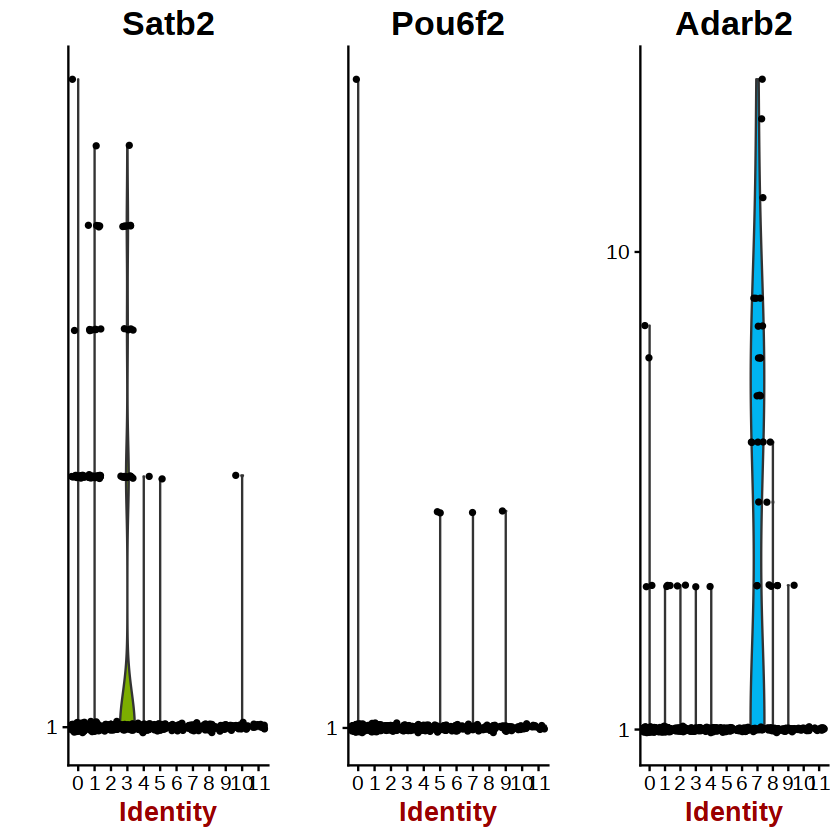

In [556]:
#VlnPlot(object = immune.combined, features.plot = c("Bcl11b", "Aif1", "Dcx"), use.raw = TRUE, y.log = TRUE)
VlnPlot(object = immune.combined, features.plot = c("Satb2", "Pou6f2", "Adarb2"), use.raw = TRUE, y.log = TRUE)


In [499]:
pdf(paste0(outDir,"ViolinPlotsMarkersSignalling.pdf"),width=15,height=10)
VlnPlot(object = immune.combined, features.plot = c("Stat3","Nfkb1","Mapk1","Hif1a"), use.raw = TRUE, y.log = TRUE)
dev.off()
pdf(paste0(outDir,"FeaturePlotMarkersSignalling.pdf"),width=15,height=10)
FeaturePlot(object = immune.combined, features.plot = c("Stat3","Nfkb1", "Mapk1","Hif1a"),cols.use = c("lightgrey", 
    "blue"), pt.size = 1)
dev.off()



png 
  2

png 
  2

In [505]:
saveRDS(immune.combined, file = paste0(outDir,"immune_combined.rds"))

In [411]:
pdf(paste0(outDir,"FeaturePlotMarkers.pdf"),width=15,height=10)
FeaturePlot(object = immune.combined, features.plot = c("Camk2a", "Kif5c", "Slc7a10", "Lfng", "Tmem119", "C1qc", "Pdgfra", "Gpr17", "Mog", "Opalin", "Flt1", "Ly6c1", "Gad1", "Gad2", "Slc17a7", "Neurod6"),cols.use = c("lightgrey", 
    "blue"), pt.size = 1)
dev.off()

png 
  2

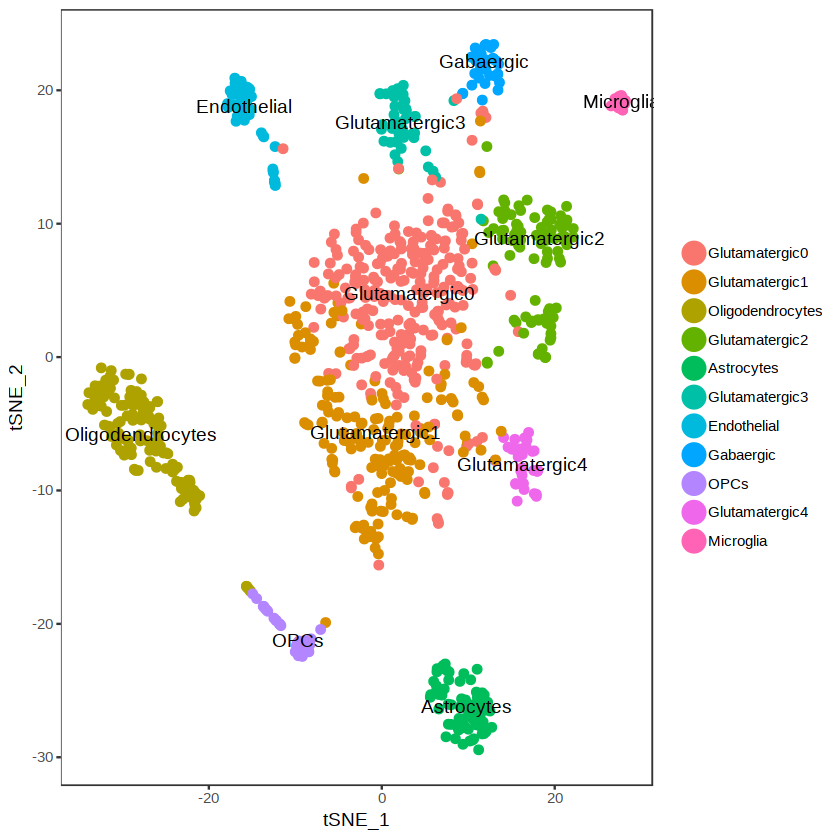

In [31]:
#pdf(paste0(outDir,"tSNE_ClustersNames.pdf"),width=15,height=10)
immune.combinedNamed <- immune.combined
new.ident <- c("Glutamatergic0","Glutamatergic1","Oligodendrocytes","Glutamatergic2","Astrocytes","Glutamatergic3","Endothelial","Gabaergic","OPCs","Glutamatergic4","Microglia","Endothelial" )
for (i in 0:11) {
    immune.combinedNamed <- RenameIdent(object = immune.combinedNamed, old.ident.name = i, 
        new.ident.name = new.ident[i + 1])
}

TSNEPlot(immune.combinedNamed, do.label = T, pt.size = 2)
#dev.off()

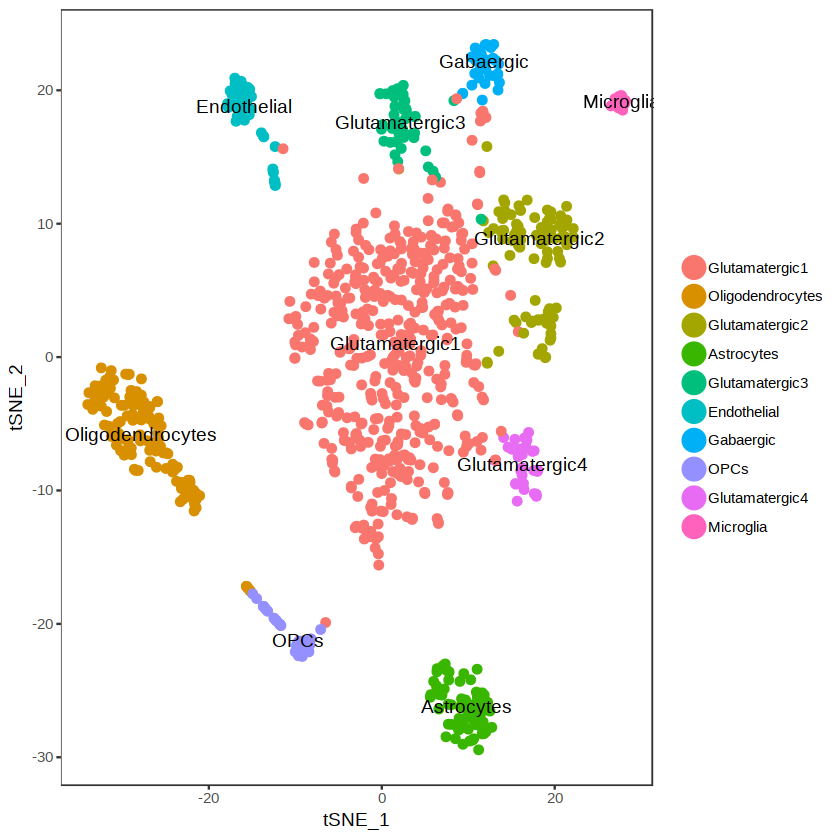

In [32]:
#pdf(paste0(outDir,"tSNE_ClustersNames.pdf"),width=15,height=10)
immune.combinedNamed <- immune.combined
new.ident <- c("Glutamatergic1","Glutamatergic1","Oligodendrocytes","Glutamatergic2","Astrocytes","Glutamatergic3","Endothelial","Gabaergic","OPCs","Glutamatergic4","Microglia","Endothelial" )
for (i in 0:11) {
    immune.combinedNamed <- RenameIdent(object = immune.combinedNamed, old.ident.name = i, 
        new.ident.name = new.ident[i + 1])
}

TSNEPlot(immune.combinedNamed, do.label = T, pt.size = 2)
#dev.off()

In [259]:
p1 <- TSNEPlot(immune.combined, do.return = T, pt.size = 3, group.by = "stim", col=c("black", "red"))
p2 <- TSNEPlot(immune.combinedNamed, do.label = T, do.return = T, pt.size = 3)
pdf(paste0(outDir,"tSNE_for_Paper13Nov2018.pdf"),width=20,height=10)
plot_grid(p2, p1)
dev.off()

png 
  2

In [380]:
Ident_names <- immune.combinedNamed@ident
table(paste(sapply(strsplit(names(immune.combinedNamed@ident),"_"),"[[",1),Ident_names, sep="_"))



      gr1_Astrocytes_CTRL      gr1_Endothelial_CTRL        gr1_Gabaergic_CTRL 
                       32                        19                        12 
  gr1_Glutamatergic1_CTRL   gr1_Glutamatergic2_CTRL   gr1_Glutamatergic3_CTRL 
                      188                        42                        11 
  gr1_Glutamatergic4_CTRL        gr1_Microglia_CTRL gr1_Oligodendrocytes_CTRL 
                       10                        12                        53 
            gr1_OPCs_CTRL       gr2_Astrocytes_STIM      gr2_Endothelial_STIM 
                       11                        43                        31 
       gr2_Gabaergic_STIM   gr2_Glutamatergic1_STIM   gr2_Glutamatergic2_STIM 
                       24                       268                        53 
  gr2_Glutamatergic3_STIM   gr2_Glutamatergic4_STIM        gr2_Microglia_STIM 
                       35                        22                         7 
gr2_Oligodendrocytes_STIM             gr2_OPCs_STIM

In [403]:
# nCells each cluster 
cluster_nCell<-as.data.frame.matrix(table(immune.combinedNamed@ident,immune.combinedNamed@meta.data$stim))
cluster_nCell

cluster_percentage=apply(cluster_nCell, 2, function(x){x*100/sum(x)})
cluster_percentage



,CTRL,STIM
Glutamatergic1,188,268
Oligodendrocytes,53,77
Glutamatergic2,42,53
Astrocytes,32,43
Glutamatergic3,11,35
Endothelial,19,31
Gabaergic,12,24
OPCs,11,23
Glutamatergic4,10,22
Microglia,12,7


,CTRL,STIM
Glutamatergic1,48.205128,45.969125
Oligodendrocytes,13.589744,13.207547
Glutamatergic2,10.769231,9.090909
Astrocytes,8.205128,7.375643
Glutamatergic3,2.820513,6.003431
Endothelial,4.871795,5.317324
Gabaergic,3.076923,4.116638
OPCs,2.820513,3.945111
Glutamatergic4,2.564103,3.773585
Microglia,3.076923,1.200686


In [406]:
Glut_percent <- t(cluster_percentage[grep("Gluta", rownames(cluster_percentage)),])

In [414]:
pdf(paste0(outDir,"Barplot_GlutPercent_for_Paper17Nov2018.pdf"),width=12,height=10)
barplot(Glut_percent , col=c("black","red"), border="white", ylim=c(0,50), font.axis=2, beside=T, legend=rownames(Glut_percent), xlab="", font.lab=2)
dev.off()

png 
  2

In [392]:
head(immune.combinedNamed@meta.data)
head(immune.combinedNamed@ident)
head(immune.combinedNamed@meta.data$res.1.1)

,nGene,nUMI,orig.ident,stim,percent.mito,res.1.1
gr1_m1d1_AGGTGAAGCGTG,5928,33359,gr1,CTRL,0.07949326,2
gr1_m1d1_TGAACTGAAACT,6852,37525,gr1,CTRL,0.03800069,0
gr1_m1d1_AGATTGTACCAA,6777,36233,gr1,CTRL,0.05575067,0
gr1_m1d1_TCCTTCGGAGAT,6266,26783,gr1,CTRL,0.04814815,0
gr1_m1d1_GAATGTGTCACA,5555,24405,gr1,CTRL,0.09618076,6
gr1_m1d1_CTACGTGTTCTA,5572,25437,gr1,CTRL,0.07362447,5


gr1_m1d1_AGGTGAAGCGTG gr1_m1d1_TGAACTGAAACT gr1_m1d1_AGATTGTACCAA 
     Oligodendrocytes        Glutamatergic1        Glutamatergic1 
gr1_m1d1_TCCTTCGGAGAT gr1_m1d1_GAATGTGTCACA gr1_m1d1_CTACGTGTTCTA 
       Glutamatergic1           Endothelial        Glutamatergic3 
10 Levels: Glutamatergic1 Oligodendrocytes Glutamatergic2 ... Microglia

[1] "2" "0" "0" "0" "6" "5"

In [33]:

fisher.test(matrix(c(11,390-11,35,583-35), nrow=2))



	Fisher's Exact Test for Count Data

data:  matrix(c(11, 390 - 11, 35, 583 - 35), nrow = 2)
p-value = 0.02127
alternative hypothesis: true odds ratio is not equal to 1
95 percent confidence interval:
 0.2056347 0.9302287
sample estimates:
odds ratio 
 0.4547656 


In [414]:
pdf(paste0(outDir,"SplitDotPlotGG.pdf"),width=10,height=10)
markers.to.plot <- c("Camk2a", "Kif5c", "Slc7a10", "Lfng", "Tmem119", "C1qc", "Pdgfra", "Gpr17", "Mog", "Opalin", "Flt1", "Ly6c1", "Gad1", "Gad2", "Slc17a7", "Neurod6")
sdp <- SplitDotPlotGG(immune.combinedNamed, genes.plot = rev(markers.to.plot), cols.use = c("blue", 
    "red"), x.lab.rot = T, plot.legend = T, dot.scale = 8, do.return = T, grouping.var = "stim")
dev.off()

png 
  2

In [433]:
# find markers for every cluster compared to all remaining cells, report
# only the positive ones
All_markers <- FindAllMarkers(object = immune.combinedNamed, only.pos = TRUE, min.pct = 0.25, 
    thresh.use = 0.25)
All_markers %>% group_by(cluster) %>% top_n(2, avg_logFC)

p_val,avg_logFC,pct.1,pct.2,p_val_adj,cluster,gene
3.632386e-127,1.781273,0.996,0.903,5.564089e-123,Glutamatergic1,Atp2b1
3.907842e-110,1.649431,0.849,0.207,5.986032e-106,Glutamatergic1,Iqgap2
1.898123e-87,3.800212,0.969,0.304,2.907544e-83,Oligodendrocytes,Mal
1.362005e-75,4.287847,1.000,0.817,2.086319e-71,Oligodendrocytes,Plp1
2.856705e-62,1.731992,0.905,0.198,4.375901e-58,Glutamatergic2,Tshz2
1.759764e-53,1.610455,0.842,0.208,2.695607e-49,Glutamatergic2,Mef2c
1.131088e-81,3.715992,1.000,0.179,1.732600e-77,Astrocytes,Slc1a3
2.617453e-51,3.718847,1.000,0.512,4.009414e-47,Astrocytes,Apoe
1.219573e-64,1.199284,0.522,0.017,1.868141e-60,Glutamatergic3,Nxph3
1.100020e-30,1.472928,0.826,0.205,1.685011e-26,Glutamatergic3,Hs3st4


In [434]:
All_markers_sig <- All_markers[(All_markers$p_val_adj<0.01),]

In [435]:
table(All_markers_sig$cluster == "Glutamatergic3")


FALSE  TRUE 
 3640   101 

In [427]:
table(All_markers_sig$cluster == "Glutamatergic3")


FALSE  TRUE 
 4375   101 

In [436]:

saveRDS(All_markers, file = paste0(outDir,"All_markers_20Nov2018.rds"))

In [437]:
Markers_eachCluster <- (split(All_markers_sig,f=as.factor(All_markers_sig$cluster)))

In [438]:
head(Markers_eachCluster$Glutamatergic3)

,p_val,avg_logFC,pct.1,pct.2,p_val_adj,cluster,gene
Nxph3,1.219573e-64,1.1992840,0.522,0.017,1.868141e-60,Glutamatergic3,Nxph3
Grik3,1.093251e-49,0.8556891,0.565,0.036,1.674642e-45,Glutamatergic3,Grik3
Cntnap4,2.091588e-44,0.9025467,0.457,0.024,3.203895e-40,Glutamatergic3,Cntnap4
Pamr1,1.043279e-40,1.0564292,0.435,0.025,1.598095e-36,Glutamatergic3,Pamr1
Cbln2,1.563379e-37,0.9768593,0.435,0.028,2.394784e-33,Glutamatergic3,Cbln2
Hs3st43,1.100020e-30,1.4729279,0.826,0.205,1.685011e-26,Glutamatergic3,Hs3st4


In [526]:
head(Markers_eachCluster$Glutamatergic3)

,p_val,avg_logFC,pct.1,pct.2,p_val_adj,cluster,gene
Nxph3,1.219573e-64,1.1992840,0.522,0.017,1.868141e-60,Glutamatergic3,Nxph3
Grik3,1.093251e-49,0.8556891,0.565,0.036,1.674642e-45,Glutamatergic3,Grik3
Cntnap4,2.091588e-44,0.9025467,0.457,0.024,3.203895e-40,Glutamatergic3,Cntnap4
Pamr1,1.043279e-40,1.0564292,0.435,0.025,1.598095e-36,Glutamatergic3,Pamr1
Cbln2,1.563379e-37,0.9768593,0.435,0.028,2.394784e-33,Glutamatergic3,Cbln2
Hs3st43,1.100020e-30,1.4729279,0.826,0.205,1.685011e-26,Glutamatergic3,Hs3st4


In [439]:
for (i in 1:length(Markers_eachCluster)) {
  write.table(Markers_eachCluster[i], file=paste0(outDir,"/Markers_20Nov2018/",names(Markers_eachCluster)[i], "markers.txt"), sep="\t", row.names=F, quote=F)
}

In [17]:
All_markers <- FindAllMarkers(object = immune.combinedNamed, only.pos = FALSE, min.pct = 0.25, 
    thresh.use = 0.25)
All_markers %>% group_by(cluster) %>% top_n(2, avg_logFC)

p_val,avg_logFC,pct.1,pct.2,p_val_adj,cluster,gene
6.584892e-74,1.102045,0.964,0.591,1.008674e-69,Glutamatergic0,Grin2b
6.795035e-64,1.433917,0.765,0.276,1.040863e-59,Glutamatergic0,Cpne7
1.689039e-66,1.477902,0.989,0.817,2.587271e-62,Glutamatergic1,Calm2
1.882799e-66,1.690523,0.927,0.491,2.884071e-62,Glutamatergic1,Hpca
1.898123e-87,3.800212,0.969,0.304,2.907544e-83,Oligodendrocytes,Mal
1.362005e-75,4.287847,1.000,0.817,2.086319e-71,Oligodendrocytes,Plp1
2.856705e-62,1.731992,0.905,0.198,4.375901e-58,Glutamatergic2,Tshz2
1.759764e-53,1.610455,0.842,0.208,2.695607e-49,Glutamatergic2,Mef2c
1.131088e-81,3.715992,1.000,0.179,1.732600e-77,Astrocytes,Slc1a3
2.617453e-51,3.718847,1.000,0.512,4.009414e-47,Astrocytes,Apoe


In [22]:
All_markers_sigNeg <- (All_markers[All_markers$avg_logFC < 0 & All_markers$p_val_adj<0.01,])

In [23]:
Markers_eachCluster <- (split(All_markers_sigNeg,f=as.factor(All_markers_sigNeg$cluster)))

In [24]:
lapply(Markers_eachCluster,dim)

$Glutamatergic0
[1] 772   7

$Glutamatergic1
[1] 61  7

$Oligodendrocytes
[1] 991   7

$Glutamatergic2
[1] 18  7

$Astrocytes
[1] 693   7

$Glutamatergic3
[1] 11  7

$Endothelial
[1] 404   7

$Gabaergic
[1] 5 7

$OPCs
[1] 69  7

$Glutamatergic4
[1] 2 7

$Microglia
[1] 14  7

In [27]:
for (i in 1:length(Markers_eachCluster)) {
  write.table(Markers_eachCluster[i], file=paste0(outDir,names(Markers_eachCluster)[i], "Negmarkers.txt"), sep="\t", row.names=F, quote=F)
}

In [26]:
Markers_eachCluster$OPCs

,p_val,avg_logFC,pct.1,pct.2,p_val_adj,cluster,gene
Syt1.7,1.817799e-12,-2.208658,0.294,0.805,2.784505e-08,OPCs,Syt1
Slc24a2.6,1.289927e-11,-1.639213,0.147,0.758,1.975910e-07,OPCs,Slc24a2
Atp1b1.5,4.009895e-11,-2.143042,0.382,0.840,6.142358e-07,OPCs,Atp1b1
Grin2b.5,8.921441e-11,-1.804912,0.147,0.717,1.366586e-06,OPCs,Grin2b
Snhg11.7,9.214318e-11,-2.369274,0.588,0.859,1.411449e-06,OPCs,Snhg11
Fbxw7.5,2.956411e-10,-1.465392,0.059,0.666,4.528631e-06,OPCs,Fbxw7
Camk2a.5,3.534688e-10,-1.651976,0.118,0.673,5.414436e-06,OPCs,Camk2a
Camk2b.6,5.081005e-10,-1.494883,0.206,0.726,7.783083e-06,OPCs,Camk2b
Meg3.7,6.571641e-10,-2.593124,0.882,0.956,1.006644e-05,OPCs,Meg3
Celf2.4,7.094896e-10,-1.361284,0.265,0.763,1.086796e-05,OPCs,Celf2


In [529]:
lapply(Markers_eachCluster,dim)

$Glutamatergic0
[1] 480   7

$Glutamatergic1
[1] 1157    7

$Oligodendrocytes
[1] 783   7

$Glutamatergic2
[1] 236   7

$Astrocytes
[1] 341   7

$Glutamatergic3
[1] 101   7

$Endothelial
[1] 542   7

$Gabaergic
[1] 144   7

$OPCs
[1] 121   7

$Glutamatergic4
[1] 291   7

$Microglia
[1] 280   7

In [441]:
top10 <- All_markers %>% group_by(cluster) %>% top_n(10, avg_logFC)
# setting slim.col.label to TRUE will print just the cluster IDS instead of
# every cell name
pdf(paste0(outDir,"HeatmapTop10Markers_Glut1Merged_20Nov2018.pdf"),width=30,height=20)
DoHeatmap(object = immune.combinedNamed, genes.use = top10$gene, slim.col.label = TRUE, remove.key = TRUE,group.label.rot = T)
dev.off()

png 
  2

In [35]:
sessionInfo()


R version 3.4.1 (2017-06-30)
Platform: x86_64-pc-linux-gnu (64-bit)
Running under: Ubuntu 16.04.4 LTS

Matrix products: default
BLAS: /opt/conda/lib/R/lib/libRblas.so
LAPACK: /opt/conda/lib/R/lib/libRlapack.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
[1] bindrcpp_0.2.2 dplyr_0.7.6    Seurat_2.3.0   Matrix_1.2-12  cowplot_0.9.3 
[6] ggplot2_3.1.0 

loaded via a namespace (and not attached):
  [1] uuid_0.1-2           snow_0.4-2           backports_1.1.2     
  [4] Hmisc_4.1-1          VGAM_1.0-5           sn_1.5-2            
  [7] plyr_1.8.4      

In [254]:
#immune.combined <- readRDS(paste0(outDir,"immune_combined.rds"))